In [1]:
import copy

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from utils.stochastic_optimization import build_hour_specific_transition_matrices
#Auto reload
%reload_ext autoreload
%autoreload 2

import time

from utils.constants import *
from utils.models_functions import *

from statsmodels.tools.sm_exceptions import ValueWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ValueWarning)

In [6]:
test_model = DeterministicModelBalancing('test', HOURS_PER_YEAR, 24, datafile='../data/2022_2023/2022_2023_data.csv',h_min=50)

results = test_model.evaluate(HOURS_PER_YEAR)

print(results.get_total_objective())

best_adj_results = test_model.best_adjustment(results)
print(best_adj_results.get_total_objective() - results.get_total_objective())

Model test
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
3071465.4674534015
432282.2630286743


In [4]:
print(results.get_total_objective())

best_adj_results = test_model.best_adjustment(results)
print(best_adj_results.get_total_objective() - results.get_total_objective())

2607813.1903279396
1041786.8730286732


In [6]:
deterministic_model = DeterministicModel('Deterministic_model_22_23_hmin50_test', HOURS_PER_YEAR, datafile='../data/2022_2023/2022_2023_data.csv', h_min=50)

results_det = deterministic_model.evaluate(HOURS_PER_YEAR)

start = time.time()
stochastic_mpc_adj_results = deterministic_model.stochastic_MPC_adjustment_load_scenarios(results_det, num_scenarios=5,scenarios_file='../results/stochastic_optimization/100_balancing_prices_scenarios_year.npy')
end = time.time()
print(f"Stochastic MPC done in {end - start} seconds")

Model Deterministic_model_22_23_hmin50_test
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Stochastic MPC done in 236.14030146598816 seconds


In [7]:
start = time.time()
stochastic_mpc_adj_results_2 = deterministic_model.stochastic_MPC_adjustment_load_scenarios_optimized(results_det, num_scenarios=5,scenarios_file='../results/stochastic_optimization/100_balancing_prices_scenarios_year.npy')
end = time.time()
print(f"Stochastic MPC optimized done in {end - start} seconds")

print("Deterministic model:")
print("Original objective: ", results_det.get_total_objective())
print("Stochastic MPC adjustment: ", stochastic_mpc_adj_results.get_total_objective() - results_det.get_total_objective())
print("Stochastic MPC adjustment optimized: ", stochastic_mpc_adj_results_2.get_total_objective() - results_det.get_total_objective())

Stochastic MPC optimized done in 8.612038850784302 seconds
Deterministic model:
Original objective:  3071465.4674534015
Stochastic MPC adjustment:  127860.4434408606
Stochastic MPC adjustment optimized:  127860.4434408606


In [3]:
# Compute and save the results for Det, HAPD and Hindsight models for 2022-2023 with all adjustments
# generate_all_results_22_23_models()

Model Deterministic_model_22_23_hmin100
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Results loaded successfully.
Model Deterministic_model_22_23_hmin100_balancing_lag_0
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_hmin100_balancing_lag_1
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_hmin100_balancing_lag_2
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_hmin100_balancing_lag_3
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_hmin100_balancing_lag_4
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_h

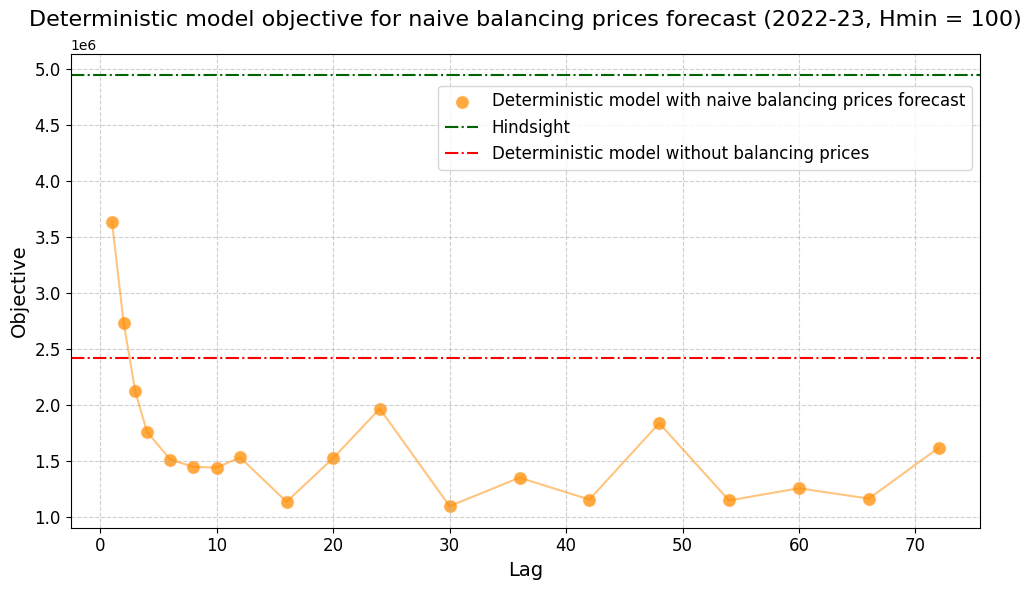

Model Deterministic_model_22_23_hmin150
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 150
Number of features: 6
Test start index: 8640
Results loaded successfully.
Model Deterministic_model_22_23_hmin150_balancing_lag_0
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 150
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_hmin150_balancing_lag_1
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 150
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_hmin150_balancing_lag_2
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 150
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_hmin150_balancing_lag_3
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 150
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_hmin150_balancing_lag_4
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 150
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_h

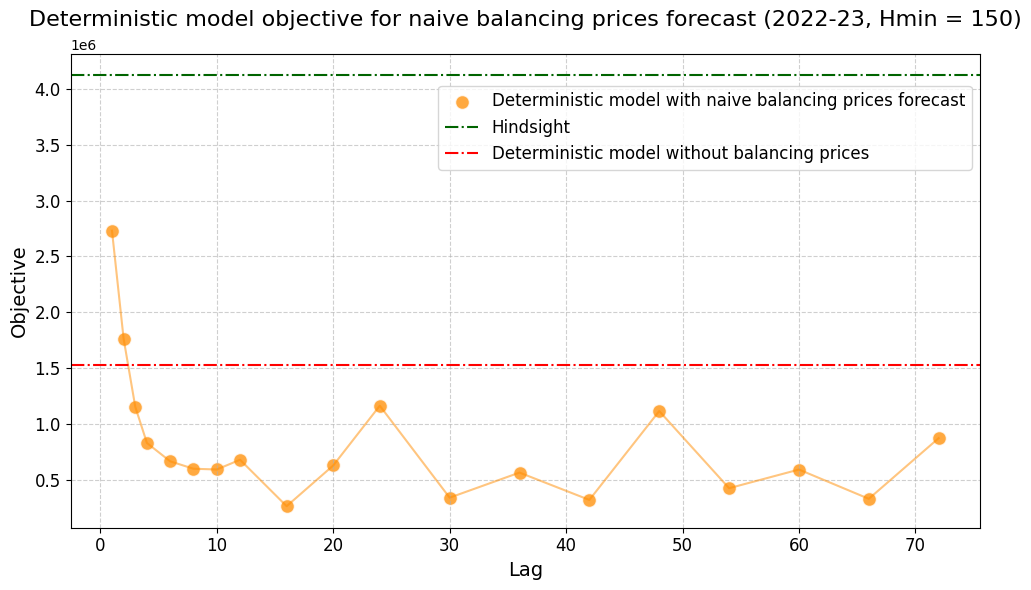

Model Deterministic_model_22_23_hmin200
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 200
Number of features: 6
Test start index: 8640
Results loaded successfully.
Model Deterministic_model_22_23_hmin200_balancing_lag_0
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 200
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_hmin200_balancing_lag_1
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 200
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_hmin200_balancing_lag_2
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 200
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_hmin200_balancing_lag_3
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 200
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_hmin200_balancing_lag_4
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 200
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_h

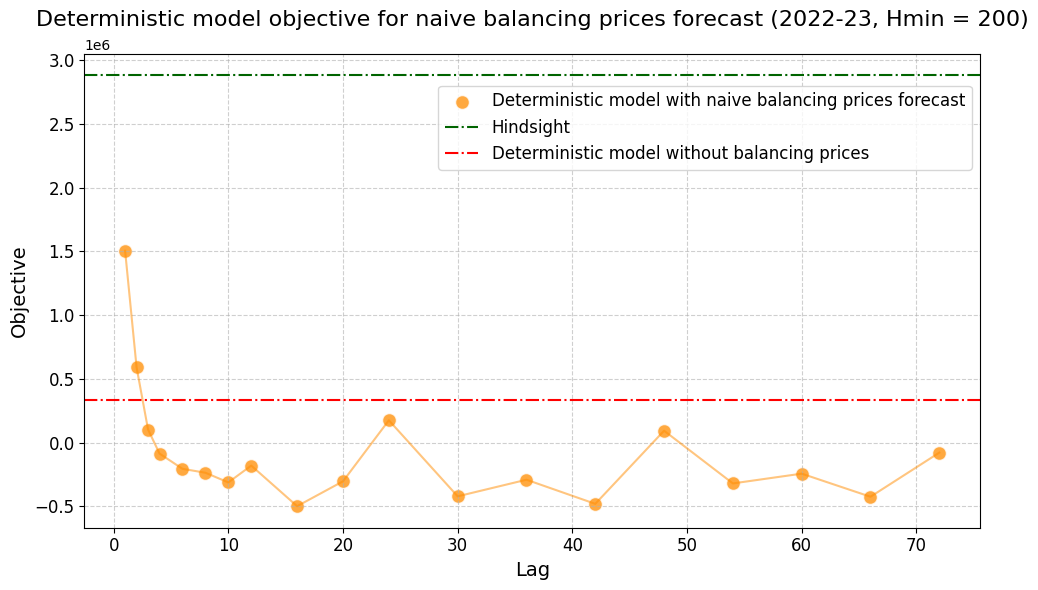

In [16]:
lags = [0, 1, 2, 3, 4, 6, 8, 10, 12, 16, 20, 24, 30, 36, 42, 48, 54, 60, 66, 72]
for h_min in [100, 150, 200]:    

    objectives = []
    
    default_deterministic_model = DeterministicModel.load('Deterministic_model_22_23_hmin{}'.format(h_min))
    results = default_deterministic_model.load_results(ORIGINAL)
    default_objective = results.get_total_objective()
    
    for lag in lags:
        deterministic_model = DeterministicModelBalancing('Deterministic_model_22_23_hmin{}_balancing_lag_{}'.format(h_min,lag), HOURS_PER_YEAR, lag, datafile='../data/2022_2023/2022_2023_data.csv',h_min=h_min)
        results = deterministic_model.evaluate(HOURS_PER_YEAR)
        objectives.append(results.get_total_objective())
        
    plt.figure(figsize=(10, 6))
    plt.scatter(lags[1:], objectives[1:], color='darkorange', edgecolors='w', s=100, alpha=0.75, label='Deterministic model with naive balancing prices forecast')
    plt.plot(lags[1:], objectives[1:], linestyle='-', color='darkorange', alpha=0.5)
    plt.axhline(y=objectives[0], color='darkgreen', linestyle='-.', label='Hindsight')
    plt.axhline(y=default_objective, color='red', linestyle='-.', label='Deterministic model without balancing prices')
    plt.xlabel('Lag', fontsize=14)
    plt.ylabel('Objective', fontsize=14)
    plt.title(f'Deterministic model objective for naive balancing prices forecast (2022-23, Hmin = {h_min})', fontsize=16, pad=20)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    # Add a dashed line at the objective of deterministic model without balancing prices
    
    plt.tight_layout()
    plt.legend(fontsize=12,loc='upper right', bbox_to_anchor=(1, 0.95))
    plt.savefig(f'../plots/2022_2023/deterministic_model_22_23_naive_forecasts_hmin{h_min}.png')
    plt.show()

In [ ]:
# lags = [0, 1, 2, 3, 4, 6, 8, 10, 12, 16, 20, 24, 30, 36, 42, 48, 54, 60, 66, 72]
# compute_and_plot_det_with_naive_balancing_22_23(lags)

In [6]:
# deterministic_model = DeterministicModel('test', HOURS_PER_YEAR, datafile='../data/2022_2023/2022_2023_data.csv')
# balancing_prices = deterministic_model.single_balancing_prices
# plot_rmse_balancing_shifted_22_23(balancing_prices,HOURS_PER_WEEK)

In [17]:
det_model = DeterministicModel('Deterministic_model_50', HOURS_PER_YEAR, datafile='../data/2022_2023/2022_2023_data.csv', h_min=50)
hapd_model = HAPDModel('HAPD_model', HOURS_PER_YEAR, h_min=50, datafile='../data/2022_2023/2022_2023_data.csv')
hapd_model.train()

results_det = det_model.evaluate(HOURS_PER_YEAR)
results_hapd = hapd_model.evaluate(HOURS_PER_YEAR)

best_adj_det = det_model.best_adjustment(results_det)
best_adj_hapd = hapd_model.best_adjustment(results_hapd)

rule_based_adj_det = det_model.rule_based_adjustment(results_det)
rule_based_adj_hapd = hapd_model.rule_based_adjustment(results_hapd)

Model Deterministic_model_50
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Model HAPD_model
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640


KeyboardInterrupt: 

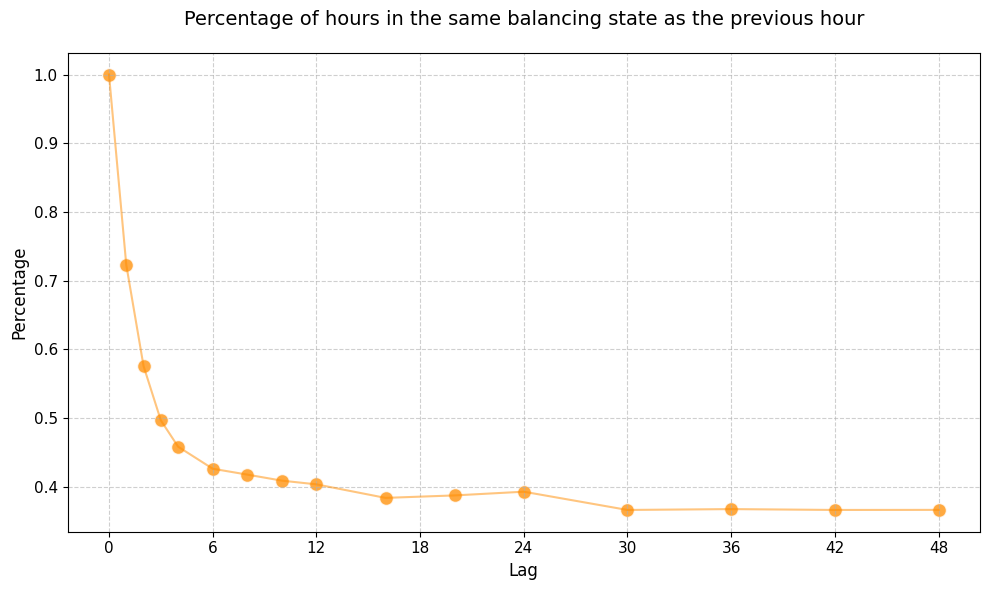

In [9]:
balancing_prices = hapd_model.single_balancing_prices
forward_prices = hapd_model.prices_F
lags = [0, 1, 2, 3, 4, 6, 8, 10, 12, 16, 20, 24, 30, 36, 42, 48]
percentages = []
for lag in lags:
    count = 0
    for i in range(0,len(balancing_prices) - HOURS_PER_YEAR):
        if (forward_prices[i] - balancing_prices[i]) * (forward_prices[i-lag] - balancing_prices[i-lag]) > 0 or (forward_prices[i] - balancing_prices[i]) == (forward_prices[i-lag] - balancing_prices[i-lag]):
            count += 1
    percentages.append(count/(len(balancing_prices) - HOURS_PER_YEAR))

plt.figure(figsize=(10, 6))
plt.scatter(lags, percentages, color='darkorange', edgecolors='w', s=100, alpha=0.75)
plt.plot(lags, percentages, linestyle='-', color='darkorange', alpha=0.5)
plt.xlabel('Lag', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Percentage of hours in the same balancing state as the previous hour', fontsize=14, pad=20)
plt.xticks([6*i for i in range(9)], fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [12]:
objectives_det = np.load('../results/mpc_naive_balancing_forecasts/mpc_adjustment_det_lags_hmin_50_22_23.npy')
objectives_hapd = np.load('../results/mpc_naive_balancing_forecasts/mpc_adjustment_hapd_lags_hmin_50_22_23.npy')

In [13]:
lags = [0, 1, 2, 3, 4, 6, 8, 10, 12, 16, 20, 24, 30, 36, 42, 48, 54, 60, 66, 72]

Model Deterministic_model_22_23_hmin50
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.


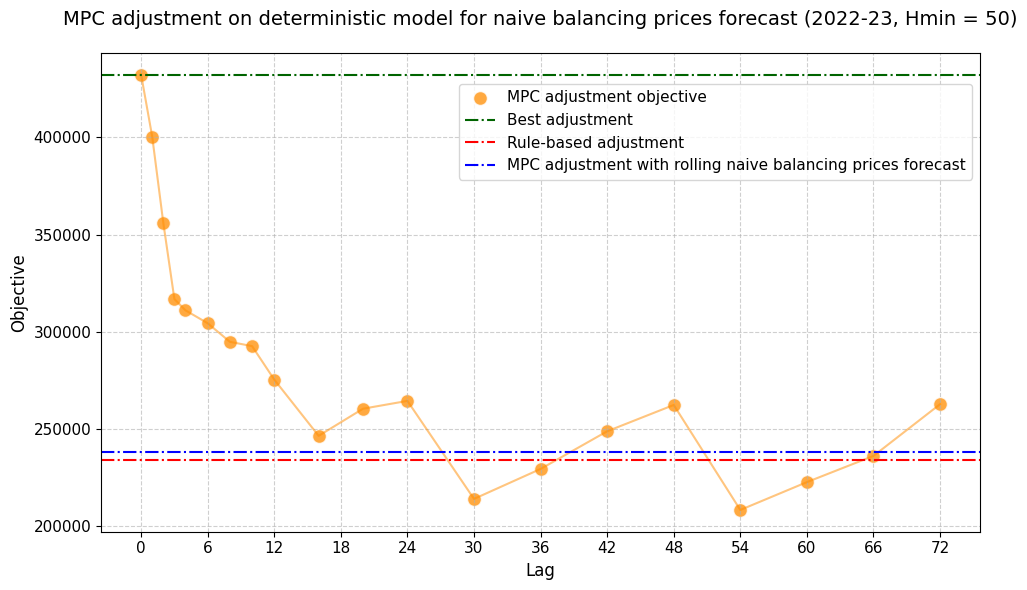

In [15]:
for h_min in [50]:
    det_model = DeterministicModel.load('Deterministic_model_22_23_hmin{}'.format(h_min))
    results_det = det_model.load_results(ORIGINAL)
    results_det_total_objective = results_det.get_total_objective()
    best_adj_det = det_model.load_results(BEST)
    rule_based_adj_det = det_model.load_results(RULE)
    # mpc_rolling_naive_objective = det_model.MPC_adjustment_with_rolling_naive_balancing_forecasts(results_det).get_total_objective()
    # objectives_det = []
    # for lag in lags:
    #     results_mpc_det = det_model.MPC_adjustment_with_rolling_naive_balancing_forecasts(results_det)
    #     objectives_det.append(results_mpc_det.get_total_objective() - results_det_total_objective)
    #     print('Lag {} done'.format(lag))

    #Plot results
    plt.figure(figsize=(10, 6))
    plt.scatter(lags, objectives_det, color='darkorange', edgecolors='w', s=100, alpha=0.75, label='MPC adjustment objective')
    plt.plot(lags, objectives_det, linestyle='-', color='darkorange', alpha=0.5)
    plt.axhline(y=best_adj_det.get_total_objective() - results_det.get_total_objective(), color='darkgreen', linestyle='-.', label='Best adjustment')
    plt.axhline(y=rule_based_adj_det.get_total_objective() - results_det.get_total_objective(), color='red', linestyle='-.', label='Rule-based adjustment')
    plt.axhline(y=mpc_rolling_naive_objective - results_det_total_objective, color='blue', linestyle='-.', label='MPC adjustment with rolling naive balancing prices forecast')
    plt.xlabel('Lag', fontsize=12)
    plt.ylabel('Objective', fontsize=12)
    plt.title(f'MPC adjustment on deterministic model for naive balancing prices forecast (2022-23, Hmin = {h_min})', fontsize=14, pad=20)
    plt.xticks([6*i for i in range(13)], fontsize=11)
    plt.yticks(fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.6)
    # Add a dashed line at the objective of deterministic model without balancing prices
    
    plt.tight_layout()
    plt.legend(fontsize=11, loc='upper right', bbox_to_anchor=(1, 0.95))
    # plt.savefig('../plots/2022_2023/mpc_adjustment_det_lags_hmin{}.png'.format(h_min))
    plt.show()

In [4]:
objectives_hapd = []
for lag in lags:
    results_mpc_hapd = hapd_model.MPC_adjustment_with_naive_balancing_forecasts(results_hapd, lag)
    objectives_hapd.append(results_mpc_hapd.get_total_objective() - results_hapd.get_total_objective())
    print('Lag {} done'.format(lag))
    
np.save('../results/mpc_naive_balancing_forecasts/mpc_adjustment_hapd_lags_hmin_50_22_23.npy', objectives_hapd)

Lag 0 done
Lag 1 done
Lag 2 done
Lag 3 done
Lag 4 done
Lag 6 done
Lag 8 done
Lag 10 done
Lag 12 done
Lag 16 done
Lag 20 done
Lag 24 done
Lag 30 done
Lag 36 done
Lag 42 done
Lag 48 done
Lag 54 done
Lag 60 done
Lag 66 done
Lag 72 done


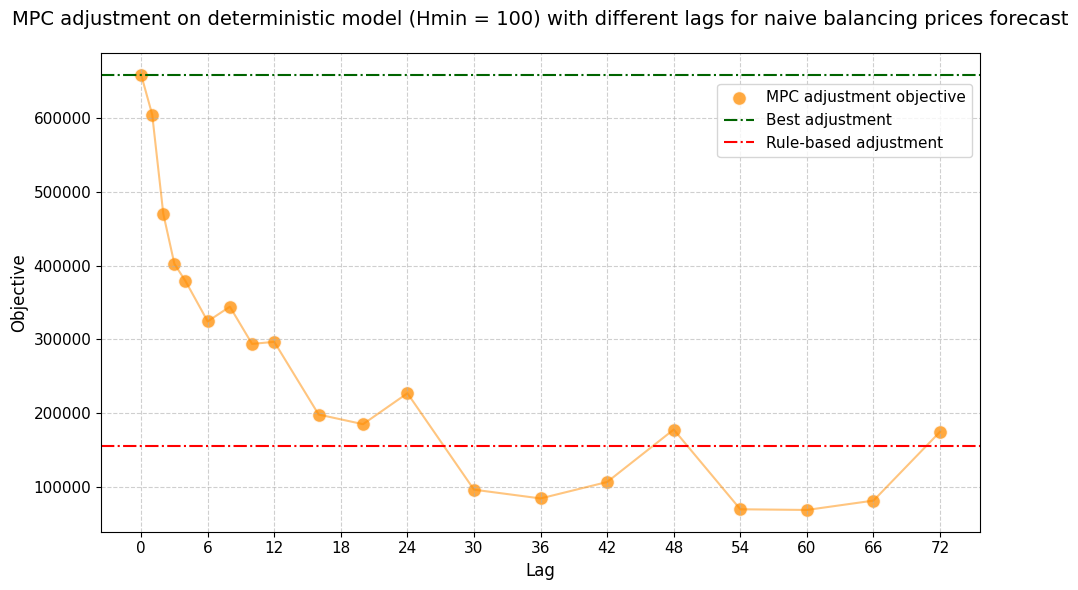

In [5]:
best_adj_det = det_model.best_adjustment(results_det)
rule_based_adj_det = det_model.rule_based_adjustment(results_det)
#Plot results
plt.figure(figsize=(10, 6))
plt.scatter(lags, objectives_det, color='darkorange', edgecolors='w', s=100, alpha=0.75, label='MPC adjustment objective')
plt.plot(lags, objectives_det, linestyle='-', color='darkorange', alpha=0.5)
plt.axhline(y=best_adj_det.get_total_objective() - results_det.get_total_objective(), color='darkgreen', linestyle='-.', label='Best adjustment')
plt.axhline(y=rule_based_adj_det.get_total_objective() - results_det.get_total_objective(), color='red', linestyle='-.', label='Rule-based adjustment')
plt.xlabel('Lag', fontsize=12)
plt.ylabel('Objective', fontsize=12)
plt.title('MPC adjustment on deterministic model (Hmin = 100) with different lags for naive balancing prices forecast', fontsize=14, pad=20)
plt.xticks([6*i for i in range(13)], fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
# Add a dashed line at the objective of deterministic model without balancing prices

plt.tight_layout()
plt.legend(fontsize=11, loc='upper right', bbox_to_anchor=(1, 0.95))
# plt.savefig('../results/mpc_naive_balancing_forecasts/mpc_adjustment_det_lags_hmin_50.png')
plt.show()

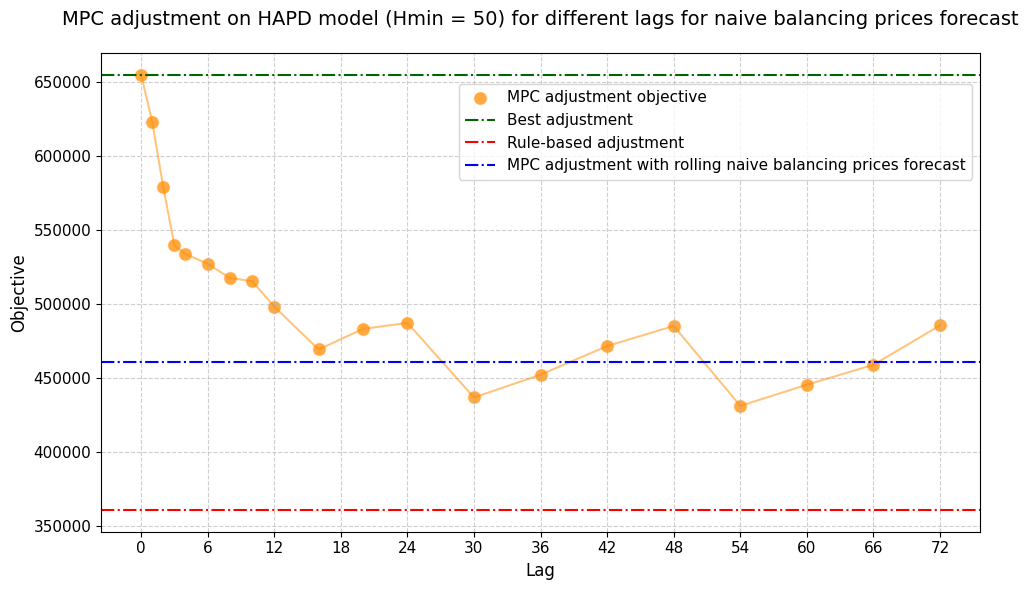

In [20]:
#Plot results
hapd_model = HAPDModel.load('HAPD_model_22_23_hmin50')
results_hapd = hapd_model.load_results(ORIGINAL)
best_adj_hapd = hapd_model.load_results(BEST)
rule_based_adj_hapd = hapd_model.load_results(RULE)

mpc_rolling_naive_objective = hapd_model.MPC_adjustment_with_naive_balancing_forecasts(results_hapd,24, rolling=True).get_total_objective()

objectives_hapd = np.load('../results/mpc_naive_balancing_forecasts/mpc_adjustment_hapd_lags_hmin_50_22_23.npy')


plt.figure(figsize=(10, 6))
plt.scatter(lags, objectives_hapd, color='darkorange', edgecolors='w', s=100, alpha=0.75,
            label='MPC adjustment objective')
plt.plot(lags, objectives_hapd, linestyle='-', color='darkorange', alpha=0.5)
plt.axhline(y=best_adj_hapd.get_total_objective() - results_hapd.get_total_objective(), color='darkgreen', linestyle='-.',
            label='Best adjustment')
plt.axhline(y=rule_based_adj_hapd.get_total_objective() - results_hapd.get_total_objective(), color='red', linestyle='-.',
            label='Rule-based adjustment')
plt.axhline(y=mpc_rolling_naive_objective - results_hapd.get_total_objective(), color='blue', linestyle='-.',
            label='MPC adjustment with rolling naive balancing prices forecast')
plt.xlabel('Lag', fontsize=12)
plt.ylabel('Objective', fontsize=12)
plt.title('MPC adjustment on HAPD model (Hmin = 50) for different lags for naive balancing prices forecast', fontsize=14, pad=20)
plt.xticks([6*i for i in range(13)], fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend(fontsize=11, loc='upper right', bbox_to_anchor=(1, 0.95))
plt.savefig('../results/mpc_naive_balancing_forecasts/mpc_adjustment_hapd_lags_hmin_50.png')
plt.show()

In [48]:
def compute_mpc_adjustment(model):
        # Load original results
    original_results = model.load_results(ORIGINAL)
    rule_base_adj_without_current_hour_results = model.rule_based_adjustment(original_results, info_on_current_hour=False)
    model.save_results(rule_base_adj_without_current_hour_results, 'Rule_based_adjustment_without_current_hour')
    print("Rule-based adjustment without current hour info done")
    mpc_naive_fc_24_results = model.MPC_adjustment_with_naive_balancing_forecasts(original_results, 24)
    model.save_results(mpc_naive_fc_24_results, 'MPC_naive_fc_24')
    print("MPC with naive forecasts lag 24 done")
    mpc_naive_fc_24_without_current_hour_results = model.MPC_adjustment_with_naive_balancing_forecasts(original_results, 24, info_on_current_hour=False)
    model.save_results(mpc_naive_fc_24_without_current_hour_results, 'MPC_naive_fc_24_without_current_hour')
    print("MPC with naive forecasts lag 24 without current hour done")

In [49]:
def plot_mpc_adjustments(model):
    
    original_results = model.load_results(ORIGINAL)
    best_adj_results = model.load_results(BEST)
    rule_based_adj_results = model.load_results(RULE)
    
    try:
        rule_base_adj_without_current_hour_results = model.load_results('Rule_based_adjustment_without_current_hour')
        mpc_naive_fc_24_results = model.load_results('MPC_naive_fc_24')
        mpc_naive_fc_24_without_current_hour_results = model.load_results('MPC_naive_fc_24_without_current_hour')
    except FileNotFoundError:
        compute_mpc_adjustment(model)
        rule_base_adj_without_current_hour_results = model.load_results('Rule_based_adjustment_without_current_hour')
        mpc_naive_fc_24_results = model.load_results('MPC_naive_fc_24')
        mpc_naive_fc_24_without_current_hour_results = model.load_results('MPC_naive_fc_24_without_current_hour')
    print("\nObjectives:")
    print(f"Best adjustment: {best_adj_results.get_total_objective() - original_results.get_total_objective()}")
    print(f"Rule-based adjustment: {rule_based_adj_results.get_total_objective() - original_results.get_total_objective()}")
    print(f"Rule-based adjustment without current hour info: {rule_base_adj_without_current_hour_results.get_total_objective() - original_results.get_total_objective()}")
    print(f"MPC adjustment with naive forecasts lag 24: {mpc_naive_fc_24_results.get_total_objective() - original_results.get_total_objective()}")
    print(f"MPC adjustment with naive forecasts lag 24 without current hour info: {mpc_naive_fc_24_without_current_hour_results.get_total_objective() - original_results.get_total_objective()}")
    print("\n Average hour at which the quota is satisfied:")
    print(f"Original results: {original_results.get_average_hour_at_which_quota_is_met(model.h_min)}")
    print(f"Best adjustment: {best_adj_results.get_average_hour_at_which_quota_is_met(model.h_min)}")
    print(f"Rule-based adjustment: {rule_based_adj_results.get_average_hour_at_which_quota_is_met(model.h_min)}")
    print(f"MPC adjustment with naive forecasts lag 24: {mpc_naive_fc_24_results.get_average_hour_at_which_quota_is_met(model.h_min)}")
    print(f"MPC adjustment with naive forecasts lag 24 without current hour info: {mpc_naive_fc_24_without_current_hour_results.get_average_hour_at_which_quota_is_met(model.h_min)}")
    
    bar_width = 0.2
    plt.figure(figsize=(10, 6))
    plt.bar(x=0, height=best_adj_results.get_total_objective() - original_results.get_total_objective(), color='forestgreen', label='Best adjustment',width=bar_width, edgecolor='darkgreen')
    
    plt.bar(x=1.5*bar_width,height=rule_based_adj_results.get_total_objective() - original_results.get_total_objective(), color='dodgerblue', label='Rule-based adjustment',width=bar_width, edgecolor='blue')
    plt.bar(x=2.5*bar_width, height=rule_base_adj_without_current_hour_results.get_total_objective() - original_results.get_total_objective(), color='dodgerblue', label='Rule-based adjustment without current hour info',width=bar_width, hatch='//', edgecolor='blue')
    
    plt.bar(x=4*bar_width, height=mpc_naive_fc_24_results.get_total_objective() - original_results.get_total_objective(), color='gold', label='MPC adjustment with naive forecasts lag 24',width=bar_width, edgecolor='darkorange')
    plt.bar(x=5*bar_width, height=mpc_naive_fc_24_without_current_hour_results.get_total_objective() - original_results.get_total_objective(), color='gold', label='MPC adjustment with naive forecasts lag 24 without current hour info',width=bar_width, hatch='//', edgecolor='orange')
    
    plt.xlabel('Adjustment type', fontsize=12)
    plt.ylabel('Objective', fontsize=12)
    plt.title(f'MPC adjustment objectives on {model.name}', fontsize=14, pad=20)
    plt.xticks([0, 2*bar_width, 4.5*bar_width], ['Best adjustment', 'Rule-based adjustment', 'MPC adjustment'], fontsize=10)
    plt.yticks(fontsize=11)
    plt.tight_layout()
    
    legend_handles = []
    patch = Patch(facecolor='white', edgecolor='black')
    legend_handles.append(patch)
    patch_2 = Patch(facecolor='white', edgecolor='black', hatch='//')
    legend_handles.append(patch_2)
    
    plt.legend(handles=legend_handles, labels=['With current hour information', 'Without current hour information\n(previous hour information used)'],
               loc='upper right', fontsize=11)
    plt.show()

Model HAPD_model_22_23_hmin50
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results saved successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.


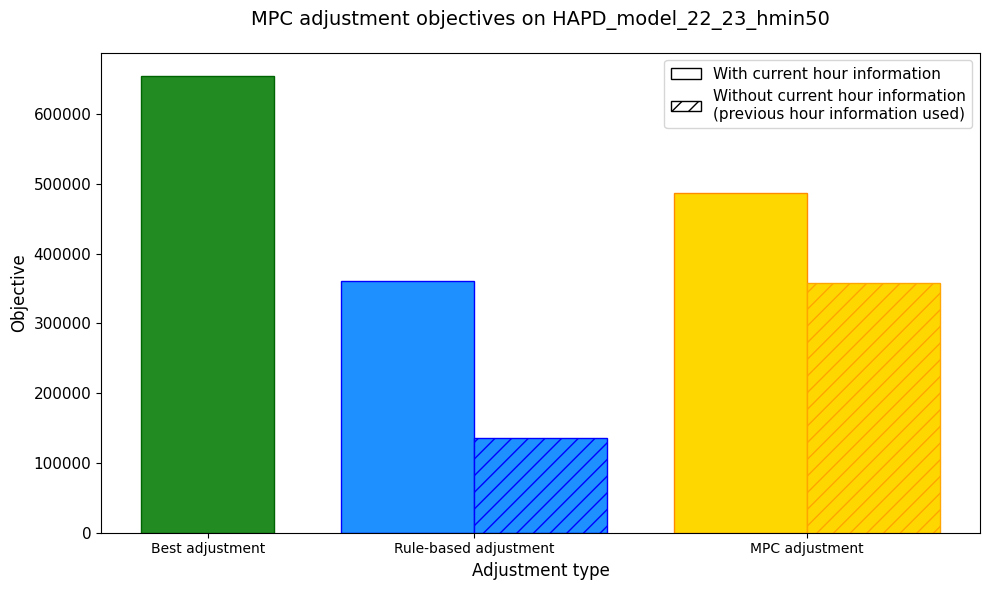

In [5]:
hapd_model = HAPDModel.load('HAPD_model_22_23_hmin50')

plot_mpc_adjustments(hapd_model)

Best adjustment = full information on balancing prices

Rule-based adjustment without current hour information = previous hour information used

MPC adjustment with naive forecasts lag 24 = Used previous day balancing prices as forecasts for the next day (except the first hour which is either realization if available or previous hour price)

I tried using the hour of the previous day instead of the previous hour, but the results were terrible (near-zero/negative objectives for both rule-based and MPC adjustments. Strong loss in revenues, even though 72 % of hours are the same sign as the previous hour).

WARNING: the MPC version here still used the current hour information when the hydrogen quota was already filled.

Model HAPD_model_22_23_hmin50
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.

Objectives:
Best adjustment: 655160.5241028233
Rule-based adjustment: 361034.1857884284
Rule-based adjustment without current hour info: 136764.98228036845
MPC adjustment with naive forecasts lag 24: 487393.16313508106
MPC adjustment with naive forecasts lag 24 without current hour info: 221738.17980174813

 Average hour at which the quota is satisfied:
Original results: 10.530555555555555
Best adjustment: 13.133333333333333
Rule-based adjustment: 11.944444444444445
MPC adjustment with naive forecasts lag 24: 13.083333333333334
MPC adjustment with naive forecasts lag 24 without current hour info: 12.530555555555555


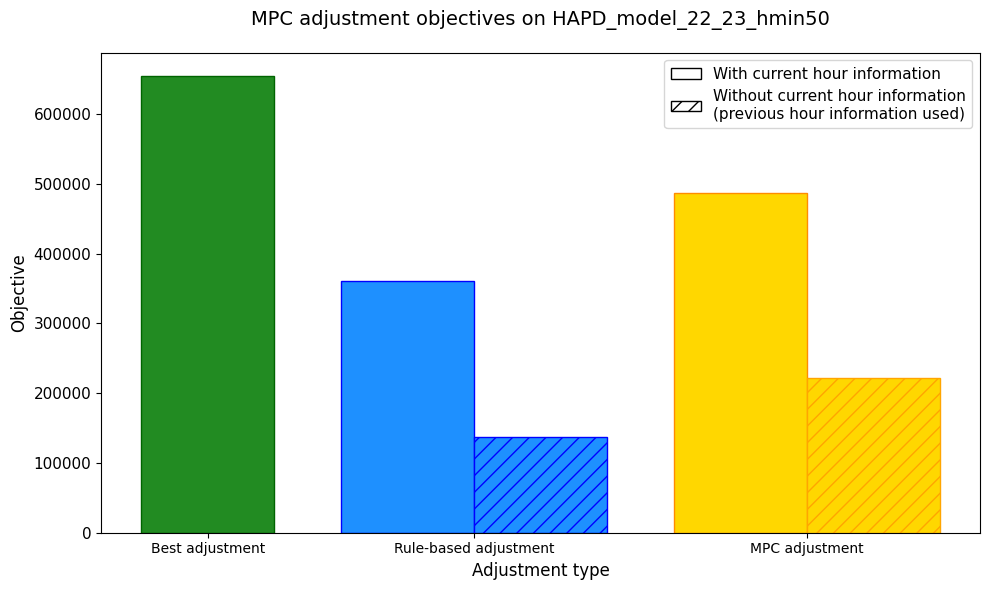

In [22]:
hapd_model = HAPDModel.load('HAPD_model_22_23_hmin50')

plot_mpc_adjustments(hapd_model)

Same but with the fix of the MPC adjustment: when the hydrogen quota is satisfied, it computes the optimal hydrogen production using the PREVIOUS HOUR balancing price as forecast for the current hour.

We observe a decrease of more than 130 000€ in the MPC revenues without current hour information compared to the "wrong" previous version. This means that knowing the price of the current hour is critical (represents at least half of the total revenue).

In [19]:
hapd_model = HAPDModel.load('HAPD_model_22_23_hmin50')

original_results = hapd_model.load_results(ORIGINAL)

mpc_results = hapd_model.MPC_adjustment_with_naive_balancing_forecasts(original_results, 24, info_on_current_hour=False)

print(mpc_results.get_total_objective() - original_results.get_total_objective())
print("Min and max objectives:")
print(f"Original: min = {np.min(original_results.objectives)}, max = {np.max(original_results.objectives)}")
print(f"MPC: min = {np.min(mpc_results.objectives)}, max = {np.max(mpc_results.objectives)}")

Model HAPD_model_22_23_hmin50
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Results loaded successfully.
221738.17980174813
Min and max objectives:
Original: min = -11553.9, max = 9345.767026820127
MPC: min = -11553.9, max = 9345.767026820127


Model Deterministic_model_22_23_hmin50
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Results loaded successfully.
Results saved successfully.
Rule-based adjustment without current hour info done
Results saved successfully.
MPC with naive forecasts lag 24 done
Results saved successfully.
MPC with naive forecasts lag 24 without current hour done
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.

Objectives:
Best adjustment: 432282.2630286743
Rule-based adjustment: 234205.3555555567
Rule-based adjustment without current hour info: 12876.872222222853
MPC adjustment with naive forecasts lag 24: 264514.9020609325
MPC adjustment with naive forecasts lag 24 without current hour info: -1140.0812724009156

 Average hour at which the quota is satisfied:
Original results: 14.4
Best adjustment: 13.133333333333333
Rule-bas

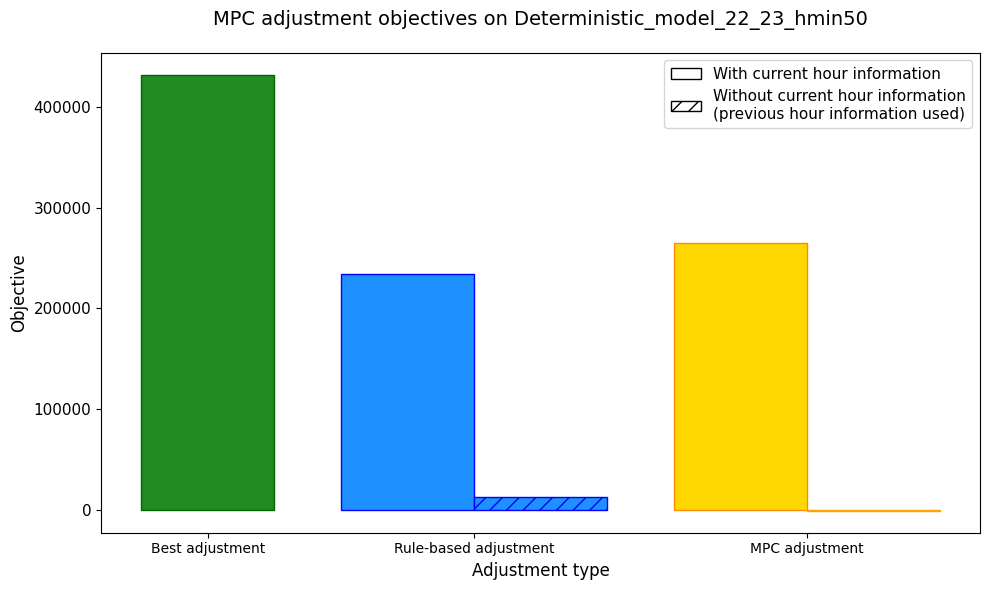

In [50]:
deterministic_model = DeterministicModel('Deterministic_model_22_23_hmin50', HOURS_PER_YEAR, datafile='../data/2022_2023/2022_2023_data.csv', h_min=50)

compute_mpc_adjustment(deterministic_model)

plot_mpc_adjustments(deterministic_model)

Rule-based adjustment without current hour information for the deterministic model is worse than the analog adjustment on the HAPD model. 

Idem for MPC.

Probably due to the fact that the deterministic model has worse forward bids and hydrogen schedule than HAPD, and thus depends more on the information it can have when adjusting.

CAREFUL: This is the deterministic model that does not depend on the balacncing prices.

Model Deterministic_model_balancing_22_23_hmin50
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results saved successfully.
Rule-based adjustment without current hour info done
Results saved successfully.
MPC with naive forecasts lag 24 done
Results saved successfully.
MPC with naive forecasts lag 24 without current hour done
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.


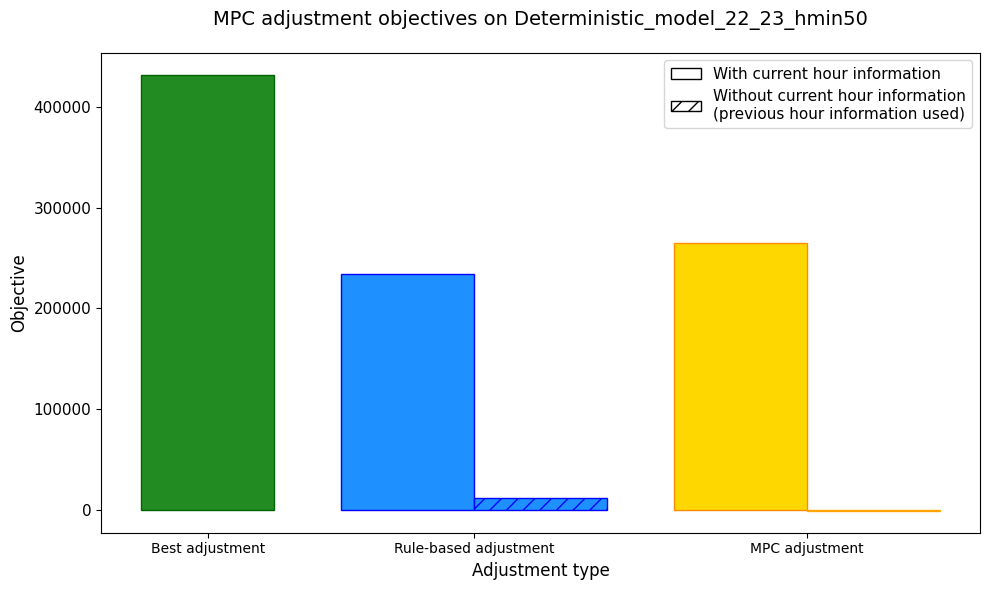

In [18]:
deterministic_model_balancing = DeterministicModelBalancing('Deterministic_model_balancing_22_23_hmin50', HOURS_PER_YEAR, datafile='../data/2022_2023/2022_2023_data.csv', balancing_prices_lag=24, h_min=50)

results = deterministic_model_balancing.evaluate(HOURS_PER_YEAR)
deterministic_model_balancing.save_results(results, ORIGINAL)

best_adj_results = deterministic_model_balancing.best_adjustment(results)
deterministic_model_balancing.save_results(best_adj_results, BEST)

rule_based_adj_results = deterministic_model_balancing.rule_based_adjustment(results)
deterministic_model_balancing.save_results(rule_based_adj_results, RULE)

test_mpc_adjustments(deterministic_model)

Deterministic model with naive balancing forecasting in objective function (balancing prices lag 24)

Same behavior as the deterministic model without balancing prices.

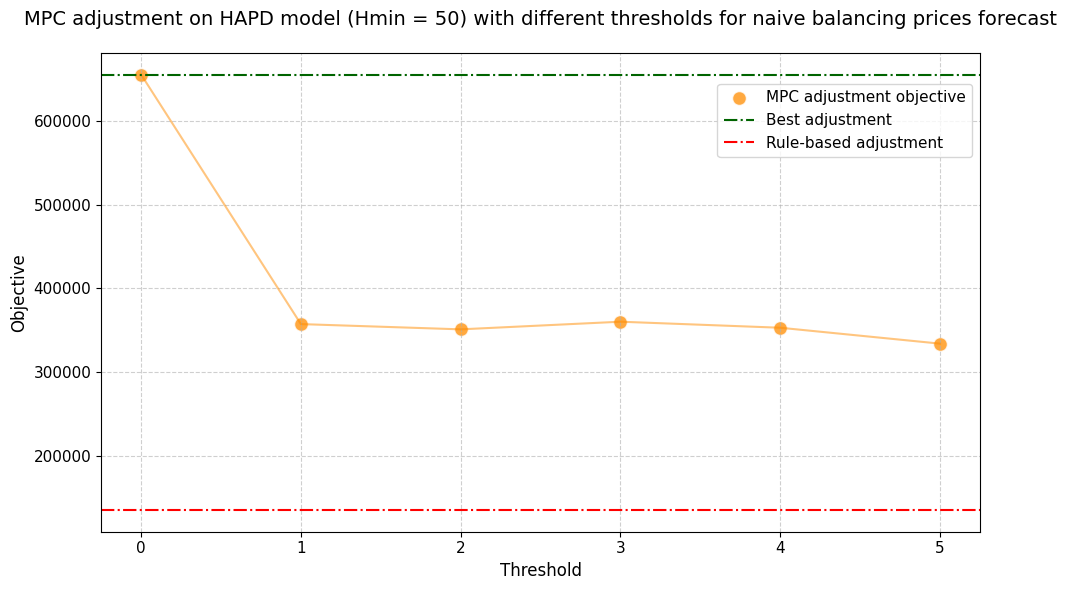

In [3]:
hapd_model = HAPDModel.load('HAPD_model_22_23_hmin50')
results_hapd = hapd_model.load_results(ORIGINAL)
best_adj_hapd = hapd_model.load_results(BEST)
mpc_adj_hapd = hapd_model.load_results(MPC)

objectives = [mpc_adj_hapd.get_total_objective() - results_hapd.get_total_objective()] 

for threshold in range(1,6):
    mpc_test_threshold_results = hapd_model.MPC_adjustment_with_naive_balancing_forecasts_2(results_hapd, 24, threshold, info_on_current_hour=False)
    objectives.append(mpc_test_threshold_results.get_total_objective() - results_hapd.get_total_objective())
    print('Threshold {} done'.format(threshold))

rule_based_adj_hapd = hapd_model.rule_based_adjustment(results_hapd, info_on_current_hour=False)

plt.figure(figsize=(10, 6))
plt.scatter(range(6), objectives, color='darkorange', edgecolors='w', s=100, alpha=0.75, label='MPC adjustment objective')
plt.plot(range(6), objectives, linestyle='-', color='darkorange', alpha=0.5)
plt.axhline(y=best_adj_hapd.get_total_objective() - results_hapd.get_total_objective(), color='darkgreen', linestyle='-.', label='Best adjustment')
plt.axhline(y=rule_based_adj_hapd.get_total_objective() - results_hapd.get_total_objective(), color='red', linestyle='-.', label='Rule-based adjustment')
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Objective', fontsize=12)
plt.title('MPC adjustment on HAPD model (Hmin = 50) with different thresholds for naive balancing prices forecast', fontsize=14, pad=20)
plt.xticks(range(6), fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend(fontsize=11, loc='upper right', bbox_to_anchor=(1, 0.95))
plt.show()

Threshold = number of hours ahead (including the current hour) for which we consider the price to be the same as the previous hour price.

Threshold = 1 means that we consider that the price for the current hour is the same as the previous hour price.

Threshold = 2 means that we consider that the price for the current hour and the next hour is the same as the previous hour price.

No real improvement in the objective function for the HAPD model: using immediate previous hour price for the current hour only appears to be the best option.

## Stochastic MPC

In [4]:
from pmdarima import auto_arima
# Setup arma models for each state
from statsmodels.tsa.statespace.sarimax import SARIMAX

dataframe = pd.read_csv('../data/2022_2023/2022_2023_data.csv')

balancing_states = np.where(dataframe['forward_RE'] > dataframe['prices_SB'], 0, np.where(dataframe['forward_RE'] < dataframe['prices_SB'], 2, 1))

epsilon = 0.1
dataframe['price_diff'] = dataframe['forward_RE'] - dataframe['prices_SB']
dataframe['balancing_state'] = balancing_states
upwards_diff = dataframe['price_diff'][:HOURS_PER_YEAR][dataframe['balancing_state'] == 2].apply(lambda x: np.log(-x + epsilon))
downwards_diff = dataframe['price_diff'][:HOURS_PER_YEAR][dataframe['balancing_state'] == 0].apply(lambda x: np.log(x + epsilon))

#Find the best ARMA parameters for each state
arma_model_up = auto_arima(upwards_diff[-HOURS_PER_MONTH:])

arma_model_dw = auto_arima(downwards_diff[-HOURS_PER_MONTH:])

display(arma_model_up.summary())
display(arma_model_dw.summary())

transition_matrices = build_hour_specific_transition_matrices(dataframe['balancing_state'][:HOURS_PER_YEAR].values, 1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  720
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1270.435
Date:                Tue, 23 Jul 2024   AIC                           2548.871
Time:                        14:53:28   BIC                           2567.182
Sample:                             0   HQIC                          2555.940
                                - 720                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6434      0.056     11.521      0.000       0.534       0.753
ma.L1         -1.2105      0.068    -17.903      0.000      -1.343      -1.078
ma.L2          0.2206      0.066      3.360      0.001       0.092       0.349
sigma2         1.9990      0.075     26.831      0.000       1.853       2.145
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               259.62
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                            -0.89
Prob(H) (two-sided):                  0.19   Kurtosis:                         5.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  720
Model:               SARIMAX(5, 0, 1)   Log Likelihood                -826.575
Date:                Tue, 23 Jul 2024   AIC                           1669.151
Time:                        14:53:28   BIC                           1705.785
Sample:                             0   HQIC                          1683.293
                                - 720                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3769      0.313      4.404      0.000       0.764       1.990
ar.L1          0.0290      0.206      0.141      0.888      -0.374       0.432
ar.L2          0.3746      0.127      2.959      0.003       0.126       0.623
ar.L3          0.0112      0.035      0.320      0.749      -0.057       0.079
ar.L4          0.0648      0.038      1.714      0.086      -0.009       0.139
ar.L5          0.1490      0.032      4.704      0.000       0.087       0.211
ma.L1          0.6041      0.209      2.892      0.004       0.195       1.013
sigma2         0.5811      0.019     30.165      0.000       0.543       0.619
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2877.10
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                            -1.42
Prob(H) (two-sided):                  0.28   Kurtosis:                        12.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [2]:
hapd_model = HAPDModel.load('hapd_hmin50')
# results_hapd = hapd_model.evaluate(HOURS_PER_YEAR)
# best_adj_hapd = hapd_model.best_adjustment(results_hapd)
# rule_based_adj_hapd = hapd_model.rule_based_adjustment(results_hapd,info_on_current_hour=False)
# mpc_adj_hapd = hapd_model.MPC_adjustment_with_naive_balancing_forecasts(results_hapd, 24, info_on_current_hour=False)
# 
# hapd_model.save_results(results_hapd, ORIGINAL)
# hapd_model.save_results(best_adj_hapd, BEST)
# hapd_model.save_results(rule_based_adj_hapd, RULE)
# hapd_model.save_results(mpc_adj_hapd, MPC)

results_hapd = hapd_model.load_results(ORIGINAL)
best_adj_hapd = hapd_model.load_results(BEST)
rule_based_adj_hapd = hapd_model.load_results(RULE)
mpc_adj_hapd = hapd_model.load_results(NAIVE_MPC)

Model hapd_hmin50
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.


In [3]:
print(results_hapd.get_total_objective())
print(best_adj_hapd.get_total_objective() - results_hapd.get_total_objective())
print(rule_based_adj_hapd.get_total_objective() - results_hapd.get_total_objective())
print(mpc_adj_hapd.get_total_objective() - results_hapd.get_total_objective())

2795883.4627377503
655160.5241028224
136764.98228036799
221738.1798017472


In [4]:
import time

stochastic_mpc_objectives = []
stochastic_mpc_objectives_improved = []
num_scenarios_list = [50,55,60,65,70,75,80,85,90,95,100]
max_scenarios = np.max(num_scenarios_list)

for num_scenarios in num_scenarios_list:
    start = time.time()
    stochastic_mpc_adj_results_2 = hapd_model.stochastic_MPC_adjustment_load_scenarios(results_hapd, num_scenarios=num_scenarios,scenarios_file='../results/stochastic_optimization/100_balancing_prices_scenarios_year.npy')
    stochastic_mpc_objectives.append(stochastic_mpc_adj_results_2.get_total_objective() - results_hapd.get_total_objective())
    end = time.time()
    stochastic_mpc_adj_results_3 = hapd_model.stochastic_MPC_adjustment_load_scenarios(results_hapd, num_scenarios=num_scenarios,scenarios_file='../results/stochastic_optimization/100_balancing_prices_scenarios_year_improved.npy')
    stochastic_mpc_objectives_improved.append(stochastic_mpc_adj_results_3.get_total_objective() - results_hapd.get_total_objective())

    print(f"Stochastic MPC with {num_scenarios} scenarios done in {end - start} seconds")

Set parameter Username
Academic license - for non-commercial use only - expires 2025-05-27
Stochastic MPC with 50 scenarios done in 21.050595998764038 seconds
Stochastic MPC with 55 scenarios done in 20.1359806060791 seconds
Stochastic MPC with 60 scenarios done in 27.740455150604248 seconds
Stochastic MPC with 65 scenarios done in 19.411827087402344 seconds
Stochastic MPC with 70 scenarios done in 17.888113260269165 seconds
Stochastic MPC with 75 scenarios done in 19.56562089920044 seconds
Stochastic MPC with 80 scenarios done in 17.593897342681885 seconds
Stochastic MPC with 85 scenarios done in 28.540344953536987 seconds
Stochastic MPC with 90 scenarios done in 16.908671379089355 seconds
Stochastic MPC with 95 scenarios done in 16.9566810131073 seconds
Stochastic MPC with 100 scenarios done in 18.346241235733032 seconds


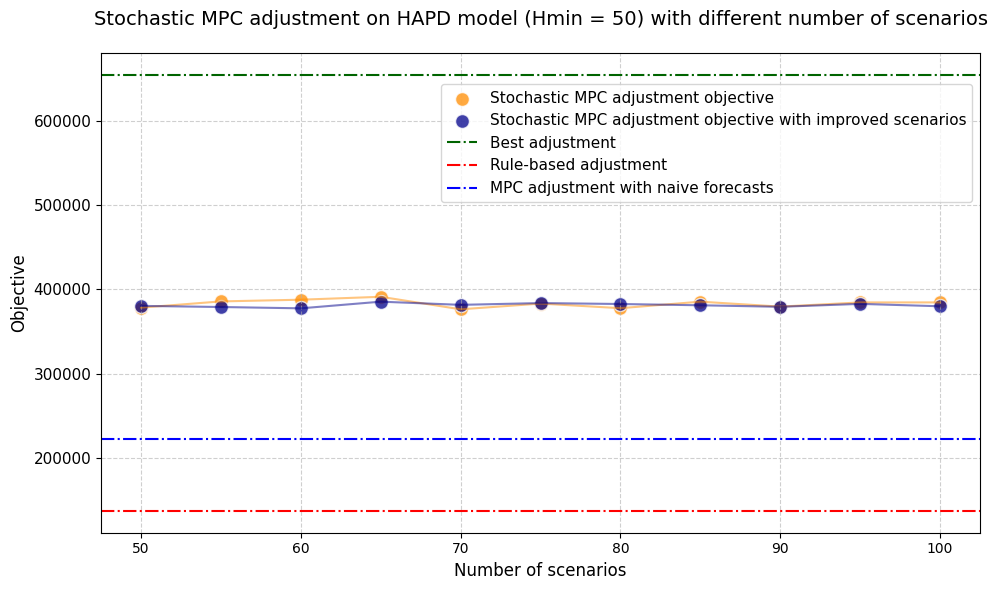

In [6]:
# num_scenarios_list = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,65]
# max_scenarios = np.max(num_scenarios_list)

plt.figure(figsize=(10, 6))
plt.scatter(num_scenarios_list, stochastic_mpc_objectives, color='darkorange', edgecolors='w', s=100, alpha=0.75, label='Stochastic MPC adjustment objective')
plt.plot(num_scenarios_list, stochastic_mpc_objectives, linestyle='-', color='darkorange', alpha=0.5)

plt.scatter(num_scenarios_list, stochastic_mpc_objectives_improved, color='darkblue', edgecolors='w', s=100, alpha=0.75, label='Stochastic MPC adjustment objective with improved scenarios')
plt.plot(num_scenarios_list, stochastic_mpc_objectives_improved, linestyle='-', color='darkblue', alpha=0.5)

plt.axhline(y=best_adj_hapd.get_total_objective() - results_hapd.get_total_objective(), color='darkgreen', linestyle='-.', label='Best adjustment')
plt.axhline(y=rule_based_adj_hapd.get_total_objective() - results_hapd.get_total_objective(), color='red', linestyle='-.', label='Rule-based adjustment')
plt.axhline(y=mpc_adj_hapd.get_total_objective() - results_hapd.get_total_objective(), color='blue', linestyle='-.', label='MPC adjustment with naive forecasts')
plt.xlabel('Number of scenarios', fontsize=12)
plt.ylabel('Objective', fontsize=12)
plt.title('Stochastic MPC adjustment on HAPD model (Hmin = 50) with different number of scenarios', fontsize=14, pad=20)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend(fontsize=11, loc='upper right', bbox_to_anchor=(1, 0.95))
plt.show()

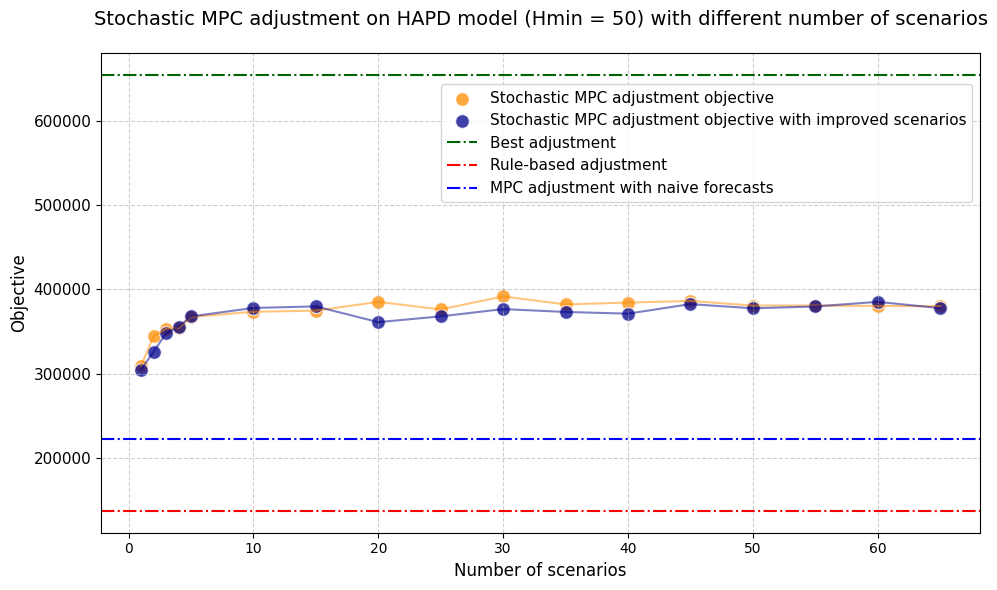

In [9]:
# num_scenarios_list = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,65]
# max_scenarios = np.max(num_scenarios_list)

plt.figure(figsize=(10, 6))
plt.scatter(num_scenarios_list, stochastic_mpc_objectives[:-1], color='darkorange', edgecolors='w', s=100, alpha=0.75, label='Stochastic MPC adjustment objective')
plt.plot(num_scenarios_list, stochastic_mpc_objectives[:-1], linestyle='-', color='darkorange', alpha=0.5)

plt.scatter(num_scenarios_list, stochastic_mpc_objectives_improved, color='darkblue', edgecolors='w', s=100, alpha=0.75, label='Stochastic MPC adjustment objective with improved scenarios')
plt.plot(num_scenarios_list, stochastic_mpc_objectives_improved, linestyle='-', color='darkblue', alpha=0.5)

plt.axhline(y=best_adj_hapd.get_total_objective() - results_hapd.get_total_objective(), color='darkgreen', linestyle='-.', label='Best adjustment')
plt.axhline(y=rule_based_adj_hapd.get_total_objective() - results_hapd.get_total_objective(), color='red', linestyle='-.', label='Rule-based adjustment')
plt.axhline(y=mpc_adj_hapd.get_total_objective() - results_hapd.get_total_objective(), color='blue', linestyle='-.', label='MPC adjustment with naive forecasts')
plt.xlabel('Number of scenarios', fontsize=12)
plt.ylabel('Objective', fontsize=12)
plt.title('Stochastic MPC adjustment on HAPD model (Hmin = 50) with different number of scenarios', fontsize=14, pad=20)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend(fontsize=11, loc='upper right', bbox_to_anchor=(1, 0.95))
plt.show()

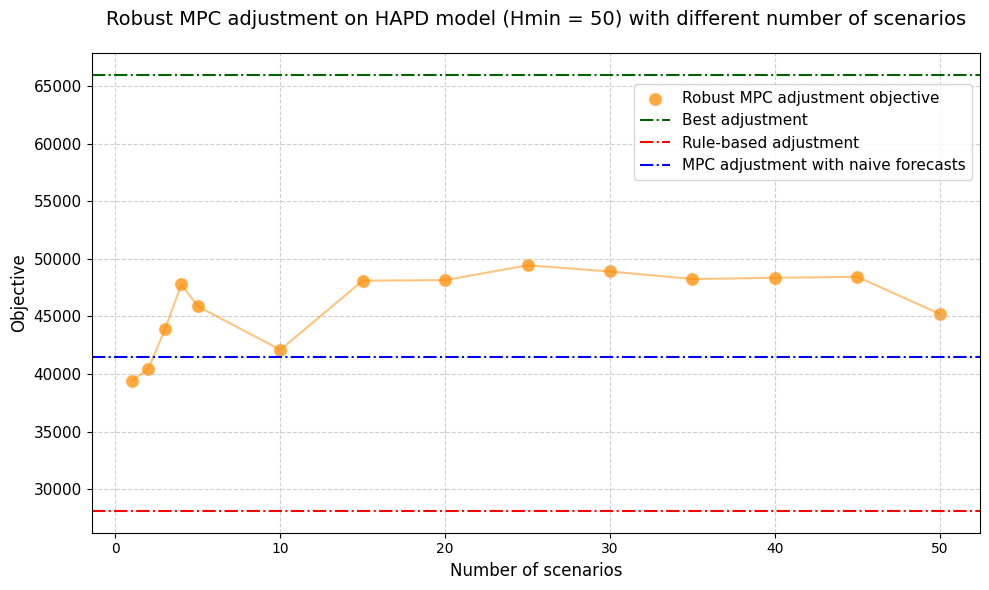

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(num_scenarios_list, stochastic_mpc_objectives, color='darkorange', edgecolors='w', s=100, alpha=0.75, label='Stochastic MPC adjustment objective')
plt.plot(num_scenarios_list, stochastic_mpc_objectives, linestyle='-', color='darkorange', alpha=0.5)
plt.axhline(y=best_adj_hapd.get_total_objective() - results_hapd.get_total_objective(), color='darkgreen', linestyle='-.', label='Best adjustment')
plt.axhline(y=rule_based_adj_hapd.get_total_objective() - results_hapd.get_total_objective(), color='red', linestyle='-.', label='Rule-based adjustment')
plt.axhline(y=mpc_adj_hapd.get_total_objective() - results_hapd.get_total_objective(), color='blue', linestyle='-.', label='MPC adjustment with naive forecasts')
plt.xlabel('Number of scenarios', fontsize=12)
plt.ylabel('Objective', fontsize=12)
plt.title('Stochastic MPC adjustment on HAPD model (Hmin = 50) with different number of scenarios', fontsize=14, pad=20)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend(fontsize=11, loc='upper right', bbox_to_anchor=(1, 0.95))
plt.show()

Testing period: 1 month

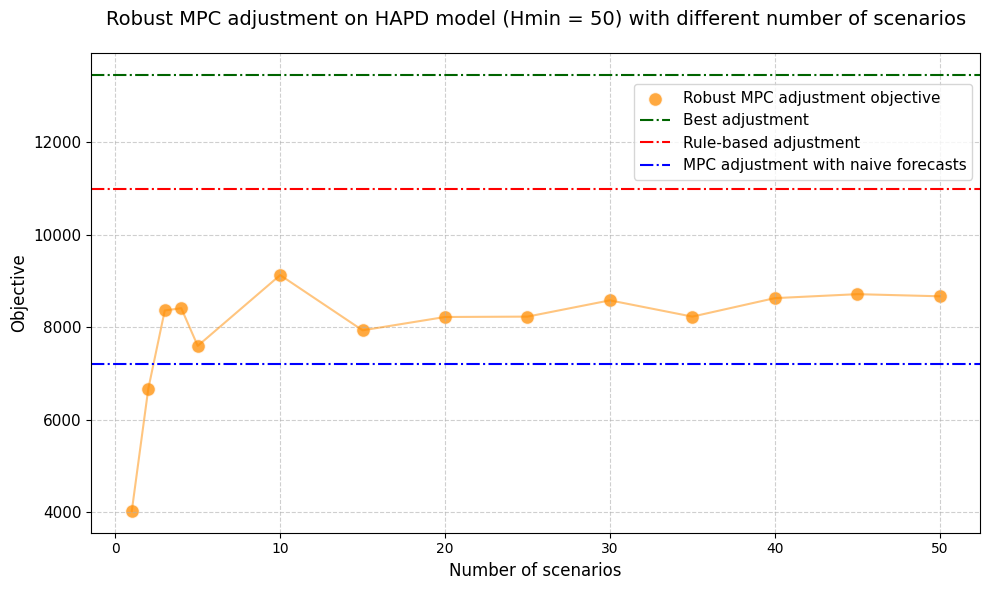

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(num_scenarios_list, stochastic_mpc_objectives, color='darkorange', edgecolors='w', s=100, alpha=0.75, label='Stochastic MPC adjustment objective')
plt.plot(num_scenarios_list, stochastic_mpc_objectives, linestyle='-', color='darkorange', alpha=0.5)
plt.axhline(y=best_adj_hapd.get_total_objective() - results_hapd.get_total_objective(), color='darkgreen', linestyle='-.', label='Best adjustment')
plt.axhline(y=rule_based_adj_hapd.get_total_objective() - results_hapd.get_total_objective(), color='red', linestyle='-.', label='Rule-based adjustment')
plt.axhline(y=mpc_adj_hapd.get_total_objective() - results_hapd.get_total_objective(), color='blue', linestyle='-.', label='MPC adjustment with naive forecasts')
plt.xlabel('Number of scenarios', fontsize=12)
plt.ylabel('Objective', fontsize=12)
plt.title('Stochastic MPC adjustment on HAPD model (Hmin = 50) with different number of scenarios', fontsize=14, pad=20)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend(fontsize=11, loc='upper right', bbox_to_anchor=(1, 0.95))
plt.show()

In [5]:
import time

stochastic_mpc_objectives = []
num_scenarios_list = range(1,11)
max_scenarios = np.max(num_scenarios_list)

for num_scenarios in num_scenarios_list:
    start = time.time()
    stochastic_mpc_adj_results_2 = hapd_model.stochastic_MPC_adjustment_load_scenarios(results_hapd, num_scenarios=num_scenarios,scenarios_file='../results/stochastic_optimization/100_balancing_prices_scenarios_year.npy')
    stochastic_mpc_objectives.append(stochastic_mpc_adj_results_2.get_total_objective() - results_hapd.get_total_objective())
    print(f"Stochastic MPC with {num_scenarios} scenarios done in {time.time() - start} seconds")

Stochastic MPC with 1 scenarios done in 96.32755327224731 seconds
Stochastic MPC with 2 scenarios done in 183.96574759483337 seconds
Stochastic MPC with 3 scenarios done in 276.95929884910583 seconds
Stochastic MPC with 4 scenarios done in 367.9101459980011 seconds
Stochastic MPC with 5 scenarios done in 449.23996233940125 seconds
Stochastic MPC with 6 scenarios done in 549.251348733902 seconds
Stochastic MPC with 7 scenarios done in 972.6820468902588 seconds
Stochastic MPC with 8 scenarios done in 1382.8839604854584 seconds
Stochastic MPC with 9 scenarios done in 1749.1324844360352 seconds
Stochastic MPC with 10 scenarios done in 2149.0161595344543 seconds


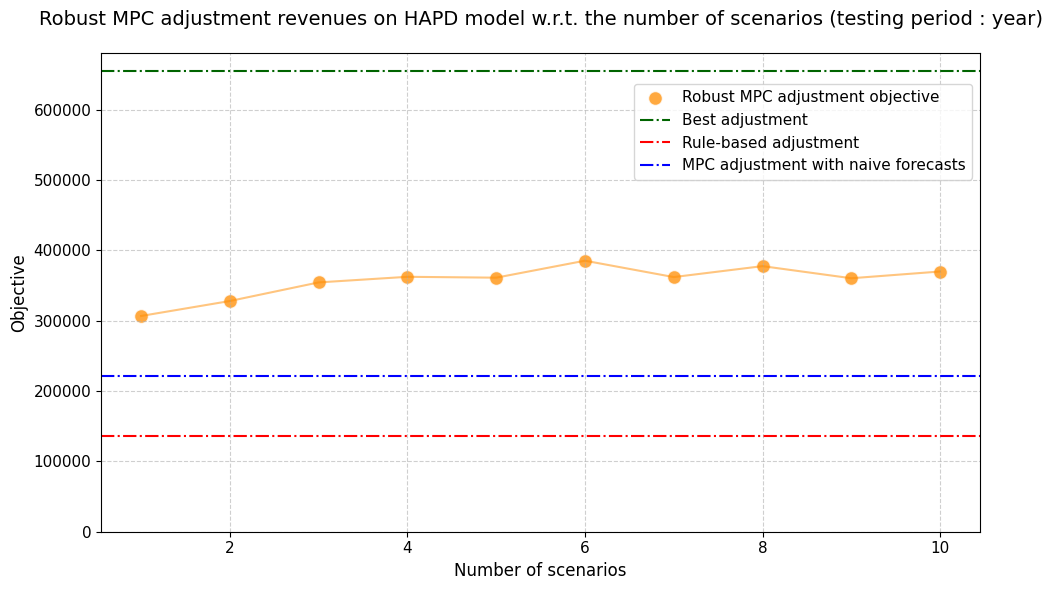

In [13]:
num_scenarios_list = range(1,11)

plt.figure(figsize=(10, 6))
plt.scatter(num_scenarios_list, stochastic_mpc_objectives, color='darkorange', edgecolors='w', s=100, alpha=0.75, label='Stochastic MPC adjustment objective')
plt.plot(num_scenarios_list, stochastic_mpc_objectives, linestyle='-', color='darkorange', alpha=0.5)
plt.axhline(y=best_adj_hapd.get_total_objective() - results_hapd.get_total_objective(), color='darkgreen', linestyle='-.', label='Best adjustment')
plt.axhline(y=rule_based_adj_hapd.get_total_objective() - results_hapd.get_total_objective(), color='red', linestyle='-.', label='Rule-based adjustment')
plt.axhline(y=mpc_adj_hapd.get_total_objective() - results_hapd.get_total_objective(), color='blue', linestyle='-.', label='MPC adjustment with naive forecasts')
plt.xlabel('Number of scenarios', fontsize=12)
plt.ylabel('Objective', fontsize=12)
plt.title('Stochastic MPC adjustment revenues on HAPD model w.r.t. the number of scenarios (testing period : year)', fontsize=14, pad=20)
plt.ylim(0,)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend(fontsize=11, loc='upper right', bbox_to_anchor=(1, 0.95))
plt.show()

In [11]:
deterministic_model = DeterministicModel('Deterministic_model_22_23_hmin50', HOURS_PER_YEAR, datafile='../data/2022_2023/2022_2023_data.csv', h_min=50)

results_det = deterministic_model.load_results(ORIGINAL)
best_adj_det = deterministic_model.load_results(BEST)
rule_based_adj_det = deterministic_model.load_results('Rule_based_adjustment_without_current_hour')
mpc_adj_det = deterministic_model.MPC_adjustment_with_naive_balancing_forecasts(results_det,24,info_on_current_hour=False)

stochastic_mpc_adj_results = deterministic_model.stochastic_MPC_adjustment_load_scenarios(results_det, num_scenarios=1,scenarios_file='../results/stochastic_optimization/100_balancing_prices_scenarios_year.npy')

print("Deterministic model:")
print("Original objective: ", results_det.get_total_objective())
print("Best adjustment: ", best_adj_det.get_total_objective() - results_det.get_total_objective())
print("Rule-based adjustment: ", rule_based_adj_det.get_total_objective() - results_det.get_total_objective())
print("MPC adjustment: ", mpc_adj_det.get_total_objective() - results_det.get_total_objective())
print("Stochastic MPC adjustment: ", stochastic_mpc_adj_results.get_total_objective() - results_det.get_total_objective())

Model Deterministic_model_22_23_hmin50
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Deterministic model:
Original objective:  3071465.4674534015
Best adjustment:  432282.2630286743
Rule-based adjustment:  12876.872222222853
MPC adjustment:  -1140.0812724009156
Stochastic MPC adjustment:  73372.22051971359
